<a href="https://colab.research.google.com/github/roshan-koirala/ceri8211globalgeophysics/blob/master/RK_HW2_Question6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRACE Gravity Anomaly**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from google.colab import drive
from matplotlib import cm, colors

In [3]:
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/Colab_Notebooks/ceri82111/HW_2/GGM05C.ICGEM', 'r') as infile: # Reading eddited data set of GCM05C (I have removed the header lines & only kept the data set)
  all_lines = infile.readlines()
header_end = 35     # Header lines = 35

data_lines = [line.split() for line in all_lines[header_end:]]  # Splits lines at space for lines except header
indices = np.array([[float(x)   for x in line[1:3]] for line in data_lines]) # Take float of second and third column 
coeff  = np.array([[float(x.replace('D', 'e')) for x in line[3:5]] for line in data_lines]) # Replace D in 4th and fifth column by e
j = np.complex(0, 1)  # j = 0 + 1j
Complex_coeff = (np.array([1, -j]) * coeff).sum(axis=1) # Generating complex coefficient

**Computing and plotting for  3- 10 Degrees**

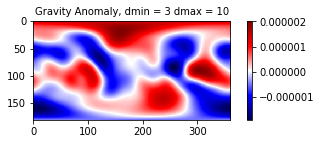

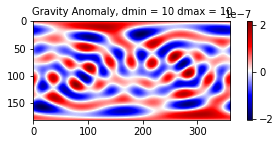

In [5]:
phi        = np.linspace(0,  np.pi,    180+1)
theta      = np.linspace(0,  2*np.pi, 360+1)
phi, theta = np.meshgrid(phi, theta, indexing='ij')

harmonics = []
dmax = 10     # Maximum degree
for (n, m), Cstar in zip(indices, Complex_coeff):   # degree (n) Order (m)
    if n > dmax:
      break
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real))

# Gravity anomalies
deg_lim = (3, 10)
Deltags = []

for dmin in deg_lim:
    count = 0
    deltag = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= dmin:
            deltag += h
            count += 1
    Deltags.append(deltag)
if True:
    plt.figure()
    for i, (dmin, deltag) in enumerate(zip(deg_lim, Deltags)):
        plt.subplot(len(Deltags), 1, i+1)
        plt.imshow(deltag, cmap='seismic')
        plt.title('Gravity Anomaly, dmin = ' + str(dmin) + ' dmax = ' + str(dmax), fontsize = 10)
        plt.colorbar()
        plt.show()
   

**Computing and plotting for  3- 60 Degrees**

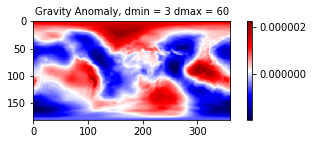

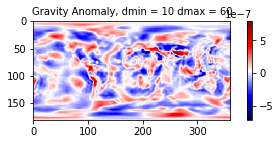

In [6]:
phi        = np.linspace(0,  np.pi,    180+1)
theta      = np.linspace(0,  2*np.pi, 360+1)
phi, theta = np.meshgrid(phi, theta, indexing='ij')

harmonics = []
dmax = 60     # Maximum degree
for (n, m), Cstar in zip(indices, Complex_coeff):   # degree (n) Order (m)
    if n > dmax:
      break
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real))

# Gravity anomalies
deg_lim = (3, 10)
Deltags = []

for dmin in deg_lim:
    count = 0
    deltag = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= dmin:
            deltag += h
            count += 1
    Deltags.append(deltag)
if True:
    plt.figure()
    for i, (dmin, deltag) in enumerate(zip(deg_lim, Deltags)):
        plt.subplot(len(Deltags), 1, i+1)
        #plt.subplot(m, 1, i+1)
        plt.imshow(deltag, cmap='seismic')
        plt.title('Gravity Anomaly, dmin = ' + str(dmin) + ' dmax = ' + str(dmax), fontsize = 10)
        plt.colorbar()
        plt.show()
   